# <b>Cirebon Mask Classification Using Combined Feature GLCM & SFTA and CNN Sequential Classifier</b>

## <b>Import Library</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

## <b>Load Dataset</b>

In [2]:
trainData = pd.read_csv('data/dfCOMB_train.csv')
testData = pd.read_csv('data/dfCOMB_test.csv')
trainLabels = pd.read_csv('data/dfLTRAIN_train.csv')
testLabels = pd.read_csv('data/dfLTEST_test.csv')

In [3]:
combine = [trainData, testData, trainLabels, testLabels]
pd.concat(combine)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,506.93771,742.165345,530.442081,866.671751,0.175163,0.169320,0.177496,0.170005,0.900115,0.853773,...,2558.0,1.457192,94.966967,2331.0,1.493424,42.337827,2522.0,1.457192,94.966967,2331.0
1,452.071782,681.159091,506.568929,794.563131,0.161801,0.155731,0.162771,0.155705,0.891290,0.836331,...,2459.0,1.437986,90.326067,2156.0,1.487348,42.582395,2488.0,1.437986,90.326067,2156.0
2,582.026985,1399.285502,1102.061912,1376.575312,0.142958,0.136409,0.146532,0.136338,0.925417,0.820684,...,2421.0,1.448868,146.854179,1639.0,1.507132,64.738904,2884.0,1.460113,150.130284,1727.0
3,596.368576,1427.003788,1116.916471,1399.538844,0.137422,0.131195,0.140620,0.130976,0.925253,0.821180,...,2400.0,1.451992,146.087635,1666.0,1.499120,65.412871,2766.0,1.464932,149.259490,1765.0
4,596.368576,1427.003788,1116.916471,1399.538844,0.137422,0.131195,0.140620,0.130976,0.925253,0.821180,...,2400.0,1.451992,146.087635,1666.0,1.499120,65.412871,2766.0,1.464932,149.259490,1765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
labels = trainLabels.iloc[:,0].unique()
print(labels)

['klana' 'pamindo' 'panji' 'rumyang' 'tumenggung']


In [5]:
label = testLabels.iloc[:,0].unique()
print(label)

['klana' 'pamindo' 'panji' 'rumyang' 'tumenggung']


In [6]:
# Transform images to array
train = np.array(trainData)
test = np.array(testData)
train_label = np.array(trainLabels)
test_label = np.array(testLabels)

In [7]:
X_train = train
y_train = train_label
print(X_train)

[[5.06937710e+02 7.42165345e+02 5.30442081e+02 ... 1.45719228e+00
  9.49669670e+01 2.33100000e+03]
 [4.52071782e+02 6.81159091e+02 5.06568929e+02 ... 1.43798618e+00
  9.03260668e+01 2.15600000e+03]
 [5.82026985e+02 1.39928550e+03 1.10206191e+03 ... 1.46011291e+00
  1.50130284e+02 1.72700000e+03]
 ...
 [4.46644395e+02 6.37968278e+02 3.85697438e+02 ... 1.52637219e+00
  9.50370821e+01 1.64500000e+03]
 [4.49162941e+02 6.45556641e+02 3.87452975e+02 ... 1.52869730e+00
  9.48435252e+01 1.66800000e+03]
 [4.44997268e+02 6.43593455e+02 3.83911488e+02 ... 1.52466067e+00
  9.46614078e+01 1.64800000e+03]]


In [8]:
# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_train[:,0])

In [9]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [10]:
# Normalize the feature data
X = X_train.astype('float32') / 255.0

In [11]:
print(X_train.shape)

(1000, 28)


In [12]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data Training : ", X_train.shape, y_train.shape)
print("Data Testing : ", X_test.shape, y_test.shape)

Data Training :  (800, 28) (800,)
Data Testing :  (200, 28) (200,)


In [14]:
# Reshape data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 28, 1), (200, 28, 1), (800,), (200,))

In [16]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 13, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 64)             0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 64)            

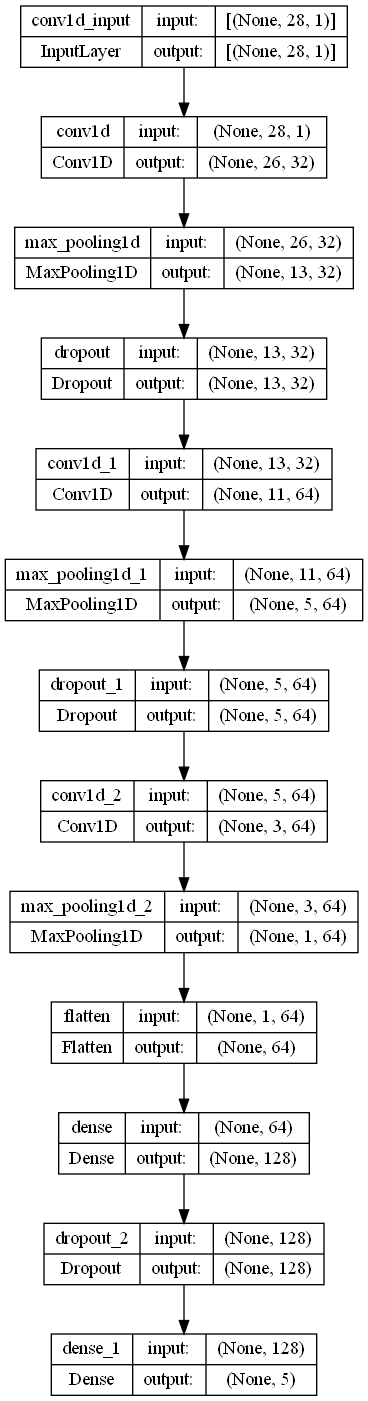

In [17]:
# Create plot model from define model CNN
tf.keras.utils.plot_model(model, to_file='model/model.png', show_shapes=True, show_layer_names=True)

In [18]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
BATCH_SIZE = 32
EPOCHS = 20
history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE,  validation_data=(X_test, y_test))

Epoch 1/20


25/25 [==============================] - 4s 30ms/step - loss: 1.4117 - accuracy: 0.3638 - val_loss: 1.1799 - val_accuracy: 0.6300
Epoch 2/20
25/25 [==============================] - 0s 10ms/step - loss: 0.8580 - accuracy: 0.7275 - val_loss: 0.5379 - val_accuracy: 0.8950
Epoch 3/20
25/25 [==============================] - 0s 11ms/step - loss: 0.3733 - accuracy: 0.8963 - val_loss: 0.1866 - val_accuracy: 0.9000
Epoch 4/20
25/25 [==============================] - 0s 10ms/step - loss: 0.1885 - accuracy: 0.9325 - val_loss: 0.1687 - val_accuracy: 0.9000
Epoch 5/20
25/25 [==============================] - 0s 14ms/step - loss: 0.1254 - accuracy: 0.9600 - val_loss: 0.0797 - val_accuracy: 0.9750
Epoch 6/20
25/25 [==============================] - 0s 17ms/step - loss: 0.0930 - accuracy: 0.9625 - val_loss: 0.0736 - val_accuracy: 0.9750
Epoch 7/20
25/25 [==============================] - 0s 10ms/step - loss: 0.0671 - accuracy: 0.9800 - val_loss: 0.0378 - val_accuracy: 0.9900
Epoch 8/20


In [20]:
# Evaluate the Model
score = model.evaluate(X_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

7/7 [==============================] - 0s 5ms/step - loss: 0.0180 - accuracy: 0.9950
Loss: 0.0180
Accuracy: 0.9950


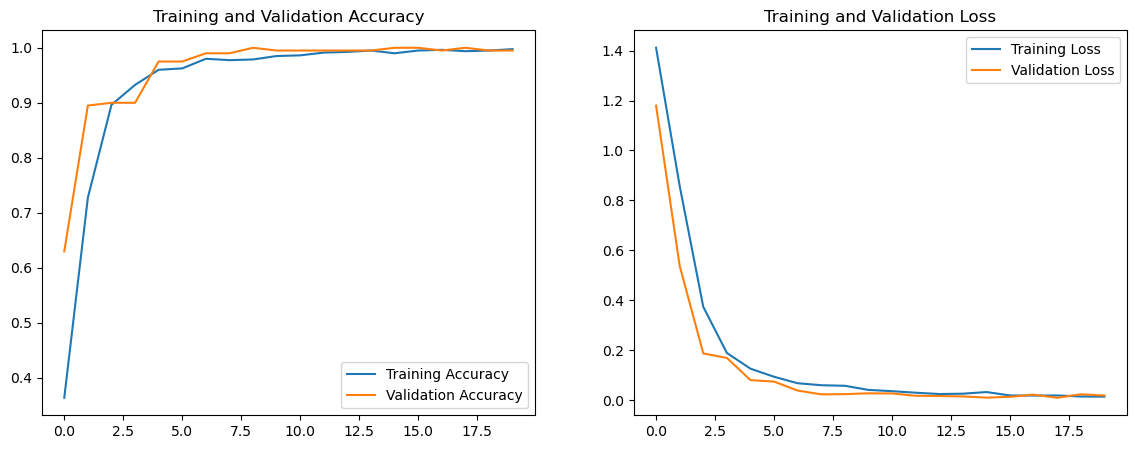

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

7/7 [==============================] - 0s 28ms/step


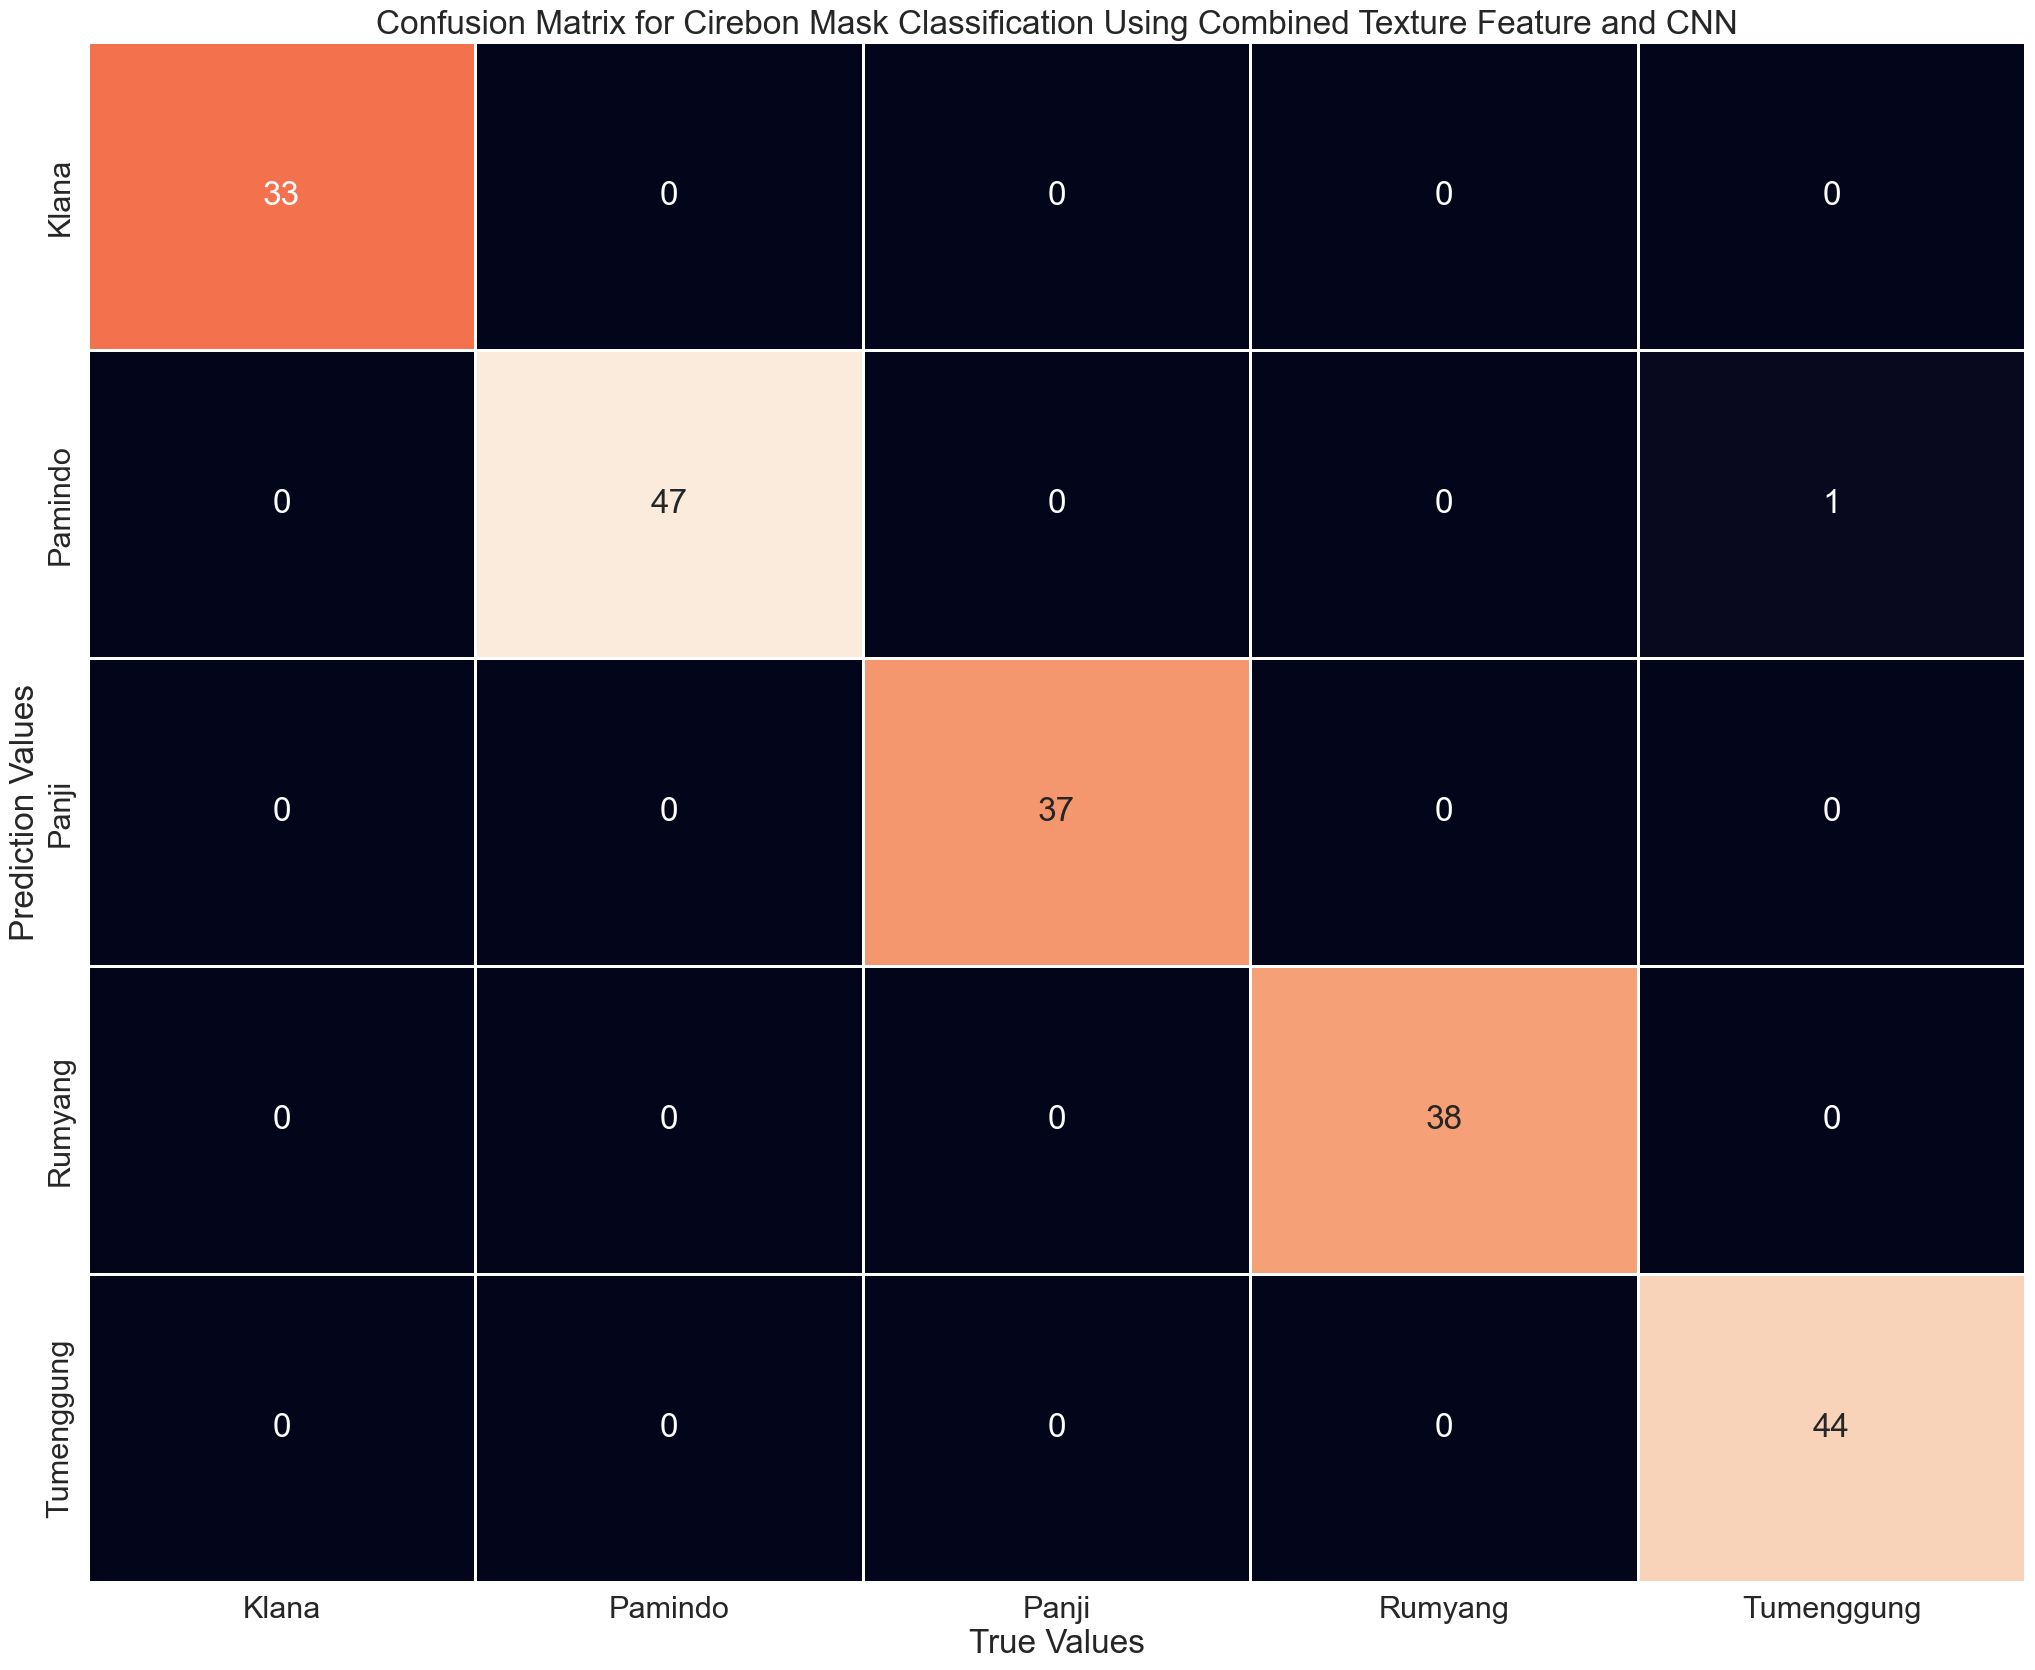

In [35]:
# Get Model Predictions for test data
class_names = ['Klana',
               'Pamindo',
               'Panji',
               'Rumyang',
               'Tumenggung']

# Plotting a confusion matrix for checking the performance of our model
Y_pred = np.argmax(model.predict(X_test), axis = 1)
cm = confusion_matrix(y_test, Y_pred, labels=np.unique(y_test), sample_weight=None)

df_cm = pd.DataFrame(cm, class_names, class_names)
sns.set(font_scale = 2)
plt.figure(figsize = (25, 20))
sns.heatmap(df_cm, annot = True, linewidths = 0.8, fmt = '0.4g', cbar = False)
plt.title("Confusion Matrix for Cirebon Mask Classification Using Combined Texture Feature and CNN")
plt.xlabel("True Values")
plt.ylabel("Prediction Values")
plt.show()

In [23]:
# Evaluate Model from Classification Report
print(classification_report(y_test, Y_pred, target_names = class_names))

              precision    recall  f1-score   support

       Klana       1.00      1.00      1.00        33
     Pamindo       1.00      0.98      0.99        48
       Panji       1.00      1.00      1.00        37
     Rumyang       1.00      1.00      1.00        38
  Tumenggung       0.98      1.00      0.99        44

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



In [24]:
evaluation = pd.DataFrame({'Model': [],
                           'Data_Train': [],
                           'Data_Test': [],
                           'Epochs': [],
                           'Batch_size':[],
                           'Loss': [],
                           'Accuracy': []
                           })

r = evaluation.shape[0]
evaluation.loc[r] = [model, str(X_train.shape), str(X_test.shape), 30, 32, score[0], score[1]]
evaluation

,Model,Data_Train,Data_Test,Epochs,Batch_size,Loss,Accuracy
0,<keras.src.engine.sequential.Sequential object...,"(800, 28, 1)","(200, 28, 1)",30,32,0.017974,0.995


In [25]:
dict = {"Model" : evaluation.Model,
        "Data Train" : evaluation.Data_Train,
        "Data Test" : evaluation.Data_Test,
        "Epochs" : evaluation.Epochs,
        "Batch Size" : evaluation.Batch_size,
        "Loss" : evaluation.Loss,
        "Accuracy" : evaluation.Accuracy
        }

df = pd.DataFrame(dict)
# Save to Drive for CSV data
df.to_csv(r"data/hasil_model.csv", index=False)

In [26]:
df

,Model,Data Train,Data Test,Epochs,Batch Size,Loss,Accuracy
0,<keras.src.engine.sequential.Sequential object...,"(800, 28, 1)","(200, 28, 1)",30,32,0.017974,0.995


In [29]:
# Save the model
import os

MODEL_PATH = 'model/'
tf.saved_model.save(model, os.path.join(MODEL_PATH, 'saved_model'))

INFO:tensorflow:Assets written to: model/saved_model\assets


INFO:tensorflow:Assets written to: model/saved_model\assets


In [34]:
tf.keras.models.save_model(model, os.path.join(MODEL_PATH, 'base_model.json'))

INFO:tensorflow:Assets written to: model/base_model.json\assets


INFO:tensorflow:Assets written to: model/base_model.json\assets
